# No Arbitrage Pricing

Used when C or P is fixed (and assumed priced correctly)

Open interest is the total number of outstanding contracts (either long or short) in a futures market.

Volumn counts the number of futures trades.

The settlement price in a futures market is the price used by the exchange to determine the daily profit or loss, margin requirements, and, in some cases, the final value of a futures contract at expiration.





In [31]:
from math import exp, log, sqrt, comb

In [ ]:
def continuous_to_apr(r):
    """
    Converts a continuously compounded annual rate to an Annual Percentage Rate (APR).
    :param r: Continuous annual rate (as a decimal)
    :return: APR (as a decimal)
    """
    return exp(r) - 1

def apr_to_continuous(apr):
    """
    Converts an APR to the equivalent continuous rate.
    :param apr: Annual Percentage Rate (as a decimal)
    :return: Continuous rate (as a decimal)
    """
    return log(1 + apr) 

In [32]:
def cal_dolloar_profit(sell_price, buy_price, t, r=0, fee=0):
    return sell_price - buy_price * exp(r*t) - fee
cal_dolloar_profit(268, 250, 1, 0.03)

10.386366511620793

In [33]:
def forward_payoff(S_T, F, type='long'):
    """
    S_T: price of the underlying asset at time T
    F: forward price, i.e. pre-agreed price of the underlying asset at time T
    """
    if type == 'long':
        return S_T - F
    else:
        return F - S_T

### Call option

give owner the right to buy an asset in the future with cost $C, and at strike price $K (sometimes denoted by $X) set today. The owner of the option has rights, while sell is obligated to sell when exercised.

### Put option

give owner the right to sell in the future with cost $P, and at strike price (sometimes denoted by $X) set today. The owner of the option has rights, the seller of a put option is obligated to buy if excercised.

European options: can be exercised only at expiration date

American options: can be exercised at any time before expiration

In [34]:
def cal_fv(pv, r, t):
    """
    pv: present value
    r: continious interest rate
    t: time period in years
    """
    return pv * exp(r*t)

In [35]:
def call_payoff(S_T, K, type='long'):
    """
    S_T: price of the underlying asset at time T
    K: strike price
    """
    if type == 'long':
        return max(S_T - K, 0)
    else:
        return -max(S_T - K, 0)

def call_profit(S_T, K, fv_cost, type='long'):
    if type == 'long':
        return call_payoff(S_T, K, type) - fv_cost # notice that this is future value! Should be adjusted!!
    else:
        return call_payoff(S_T, K, type) + fv_cost

In [36]:
def put_payoff(S_T, K, type='long'):
    """
    S_T: price of the underlying asset at time T
    K: strike price
    """
    if type == 'long':
        return max(K - S_T, 0)
    else:
        return -max(K - S_T, 0)

def put_profit(S_T, K, fv_cost, type='long'):
    if type == 'long':
        return put_payoff(S_T, K, type) - fv_cost
    else:
        return put_payoff(S_T, K, type) + fv_cost

A spot market transaction calls for immediate payment and delivery of an asset

A forward contract is an agreement to:
- buy/sell (long/short) a pre-specified asset
- at a pre-specified date-time and location
- at a pre-specified price, the forward price

A futures contract is a standardized exchange-traded forward contract

<img src="image_No_Arbitrage.png" alt="Alt text" width="500">

- $S$ is the price of the spot market transaction
- $S_t$ is the spot price at some future time t
- $S_T$ is the spot price when a related derivative contract expires 
- $F$ is the forward price (set such that forward premium = 0)
- $C$ is the cost of the right to buy the asset in the future, by the strike price set today. (Call option)
- $P$ is the cost to sell the asset in the future, by the strike price set today. (Put option)
- $K$ (or $X$) is the strike (also called exercise) price, which is an agreed price at whjich call owner can buy of put owner can sell.



In [37]:
def spot_to_forward(S_0, r, t, q=0, D=0):
    """
    S_0: spot price of the underlying asset
    r: risk-free rate
    t: time to maturity
    q: dividend yield
    D: dividend
    """
    return (S_0-D) * exp((r - q) * t)
S_0 = 3056.65
q = 0.0196
t = 9/12
r = 0.025
D = 0
F = spot_to_forward(S_0, r, t, q, D)
F

3069.054534727379

In [38]:
def spot_to_forward_varidiv(S_0, r, t, D, t_D, q=0):
    """
    S_0: spot price of the underlying asset
    r: risk-free rate
    t: time to maturity
    D: list of dividends
    t_D: list of time to dividends, in annual fraction
    """
    F = S_0 * exp((r - q) * t)
    for i in range(len(D)):
        F -= D[i] * exp((r-q) * t_D[i])
    return F
S_0 = 43.62
D = [0.72, 0.72]
t_D = [63/365, 154/365]
r = 0.025
t = 0.5
spot_to_forward_varidiv(S_0, r, t, D, t_D)
    

42.71792377906166

In [40]:
def spot_to_forward_with_store_cost(S_0, r, t, c=0, t_c=1, q=0, D=0):
    """
    S_0: spot price of the underlying asset
    r: risk-free rate
    t: time to maturity
    q: dividend yield
    D: dividend
    c: cost of carry
    t_c: time to carry cost, in annual fraction
    """

    F = S_0 * exp((r - q) * t)
    for i in range(int(t/t_c)):
        F += c * exp((r-q) * (t-i*t_c))
    return F
S_0 = 1522
c = 1.52
t_c = 1/12
r = 0.025
t = 0.5
spot_to_forward_with_store_cost(S_0, r, t, c, t_c)

1550.3312044313766

In [41]:
def forward_to_spot(F, r, t, q=0, D=0, c=0):
    """
    F: forward price
    r: risk-free rate
    t: time to maturity
    q: dividend yield
    D: dividend
    c: storage cost per unit, annualized
    """
    return F * exp((q - r) * t) + D - c
F = 3072.22
q = 0.0196
r = 0.025
t = 22/365
forward_to_spot(F, r, t, q)


3071.2202182308456

In [42]:
S_0 = 43.62


In [43]:
S_0 = 68.75
K = 70
p = 3.45
r = 0.03
t = 1
def cal_call_price_from_put(S_0, K, p, r, t):
    """
    S_0: spot price of the underlying asset
    K: strike price
    p: put price
    r: risk-free rate
    t: time to maturity
    """
    return p + S_0 - K * exp(-r*t)
cal_call_price_from_put(S_0, K, p, r, t)

4.268812651604435

In [44]:
def cal_put_price_from_call(S, C, K, r, t):
    return C - S + K * exp(-r*t)

# Binomial and BSM Pricing

Price C or P when only having S available

We need to know something about the 'price process' - or how prices evolve through time, because ultimately the price of a call option depends on 

1. the probability that $S_T > K$,

2. $E(S_T | S_T > K)$

## Binomial

In [45]:
import pandas as pd

In [46]:
5*0.4872*(1-0.4872)**4

0.16844935407542097

In [47]:
import pandas as pd
def binomial_pricing(S_0, u, d, t_max=10):
    """
    S_0: spot price of the underlying asset
    u: number of up movement
    d: number of down movement
    t: time to maturity
    """
    # build a table to store the price of the underlying asset
    # with j as the number of times of up movement, t_max - j as the number of times of down movement
    df = pd.DataFrame(index=range(t_max+1), columns=range(t_max+1))
    df.iloc[0, 0] = S_0
    for j in range(1, t_max+1):
        df.iloc[j, 0] = df.iloc[j-1, 0] * u
        for i in range(1, j+1):
            df.iloc[j, i] = df.iloc[j-1, i-1] * d
    return df
S_0 = 80
x = 0.03
t_max = 10
# row is the time period, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
# column is the number of down movement, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
binomial_pricing(S_0, x, t_max)


,0,1,2,3,4,5,6,7,8,9,10
0,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.4,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.072,24.0,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00216,0.72,240.0,80000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000065,0.0216,7.2,2400.0,800000,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000002,0.000648,0.216,72.0,24000.0,8000000,NaN,NaN,NaN,NaN,NaN
6,0.0,0.000019,0.00648,2.16,720.0,240000.0,80000000,NaN,NaN,NaN,NaN
7,0.0,0.000001,0.000194,0.0648,21.6,7200.0,2400000.0,800000000,NaN,NaN,NaN
8,0.0,0.0,0.000006,0.001944,0.648,216.0,72000.0,24000000.0,8000000000,NaN,NaN
9,0.0,0.0,0.0,0.000058,0.01944,6.48,2160.0,720000.0,240000000.0,80000000000,NaN


In [48]:
def european_call_binomial_pricer(S0, K, T, r, sigma, n):
    """
    Calculates the price of a European call option using an n-period binomial model.

    Args:
        S0 (float): Initial stock price.
        K (float): Strike price of the option.
        T (float): Time to expiration (in years).
        r (float): Continuously compounded risk-free interest rate.
        sigma (float): Volatility of the underlying stock.
        n (int): The number of periods (steps) in the binomial model.

    Returns:
        float: The estimated price of the European call option.
    """
    # --- 1. Setup: Calculate intermediate parameters ---
    
    # h is the time per period (also called delta T or dt)
    h = T / n
    
    # Calculate the up and down factors for the stock price
    # These are derived from the stock's volatility
    u = exp(sigma * sqrt(h))
    d = 1 / u  # The down factor is the reciprocal of the up factor

    # Calculate the risk-neutral probability 'p' of an up-move
    # This is the probability that makes the expected return on the stock
    # equal to the risk-free rate.
    p = (exp(r * h) - d) / (u - d)

    # --- 2. Main Calculation: Sum of discounted expected payoffs ---
    
    # Initialize the call price to zero. We will sum up the expected
    # value of the payoff for all possible outcomes.
    call_price = 0.0

    # Loop through all possible numbers of up-moves, from j=0 to n
    for j in range(n + 1):
        # This loop implements the summation part of the formula from the slide.
        
        # Calculate the final stock price (ST) for a path with 'j' up-moves
        # and (n-j) down-moves.
        ST = S0 * (u**j) * (d**(n - j))

        # Calculate the payoff of the call option for this final stock price.
        # The payoff is max(0, S_T - K).
        payoff = max(0, ST - K)

        # Calculate the number of unique paths that result in 'j' up-moves.
        # This is the binomial coefficient C(n, j).
        num_paths = comb(n, j)
        
        # Calculate the probability of any single path with 'j' up-moves occurring.
        path_probability = (p**j) * ((1 - p)**(n - j))

        # Add the contribution of this outcome to the total expected value.
        # This is: (Number of Paths * Probability of Path * Payoff)
        call_price += num_paths * path_probability * payoff

    # --- 3. Discounting: Calculate the present value ---
    
    # Discount the total expected future payoff back to today's value
    # using the risk-free rate. The total time is T = n*h.
    discount_factor = exp(-r * T)
    
    return call_price * discount_factor

# --- Example Usage ---
# --- Input Parameters ---
initial_price = 80     # S0: Current price of the underlying asset
strike_price = 80      # K: The price at which the option can be exercised, i.e. the strike price
time_to_expiry = 3/12      # T: Time until the option expires (in years)
risk_free_rate = 0.03   # r: Risk-free interest rate (e.g., 5%)
volatility = 0.25        # sigma: Annualized volatility of the stock (e.g., 20%)
num_periods = 5       # n: Number of steps in the binomial tree

# --- Calculate and Print the Option Price ---
call_option_price = european_call_binomial_pricer(
    S0=initial_price,
    K=strike_price,
    T=time_to_expiry,
    r=risk_free_rate,
    sigma=volatility,
    n=num_periods
)

print("--- Binomial Option Pricing Model ---")
print(f"Initial Stock Price: {initial_price}")
print(f"Strike Price: {strike_price}")
print(f"Time to Expiration (Years): {time_to_expiry}")
print(f"Risk-Free Rate: {risk_free_rate}")
print(f"Volatility: {volatility}")
print(f"Number of Periods: {num_periods}")
print("---------------------------------------")
print(f"Calculated European Call Option Price: {call_option_price:.4f}")

# then, we can use the prior formula to calculate the price of the put option
put_price = cal_put_price_from_call(S = initial_price, C = call_option_price, K = strike_price, r = risk_free_rate, t = time_to_expiry)
print(f"Calculated European Put Option Price: {put_price:.4f}")

--- Binomial Option Pricing Model ---
Initial Stock Price: 80
Strike Price: 80
Time to Expiration (Years): 0.25
Risk-Free Rate: 0.03
Volatility: 0.25
Number of Periods: 5
---------------------------------------
Calculated European Call Option Price: 4.4786
Calculated European Put Option Price: 3.8808


In [49]:
# Also, the put price can be calculated from beginning

def european_put_binomial_pricer(S0, K, T, r, sigma, n):
    """
    Calculates the price of a European put option using an n-period binomial model.

    Args:
        S0 (float): Initial stock price.
        K (float): Strike price of the option.
        T (float): Time to expiration (in years).
        r (float): Continuously compounded risk-free interest rate.
        sigma (float): Volatility of the underlying stock.
        n (int): The number of periods (steps) in the binomial model.

    Returns:
        float: The estimated price of the European put option.
    """
    # --- 1. Setup: Calculate intermediate parameters ---
    
    # h is the time per period (also called delta T or dt)
    h = T / n
    
    # Calculate the up and down factors for the stock price
    u = exp(sigma * sqrt(h))
    d = 1 / u

    # Calculate the risk-neutral probability 'p' of an up-move
    p = (exp(r * h) - d) / (u - d)

    # --- 2. Main Calculation: Sum of discounted expected payoffs ---
    
    put_price = 0.0

    # Loop through all possible numbers of up-moves, from j=0 to n
    for j in range(n + 1):
        # Calculate the final stock price (ST) for a path with 'j' up-moves
        ST = S0 * (u**j) * (d**(n - j))

        # --- KEY CHANGE FOR A PUT OPTION ---
        # Calculate the payoff of the put option for this final stock price.
        # The payoff is max(0, K - S_T).
        payoff = max(0, K - ST)

        # Calculate the number of unique paths that result in 'j' up-moves.
        num_paths = comb(n, j)
        
        # Calculate the probability of any single path with 'j' up-moves occurring.
        path_probability = (p**j) * ((1 - p)**(n - j))

        # Add the contribution of this outcome to the total expected value.
        put_price += num_paths * path_probability * payoff

    # --- 3. Discounting: Calculate the present value ---
    
    # Discount the total expected future payoff back to today's value
    discount_factor = exp(-r * T)
    
    return put_price * discount_factor

# --- Example Usage ---
# --- Input Parameters ---
initial_price = 100      # S0: Current price of the underlying asset
strike_price = 105       # K: The price at which the option can be exercised
time_to_expiry = 1       # T: Time until the option expires (in years)
risk_free_rate = 0.05    # r: Risk-free interest rate (e.g., 5%)
volatility = 0.2         # sigma: Annualized volatility of the stock (e.g., 20%)
num_periods = 100        # n: Number of steps in the binomial tree

# --- Calculate and Print the Option Price ---
put_option_price = european_put_binomial_pricer(
    S0=initial_price,
    K=strike_price,
    T=time_to_expiry,
    r=risk_free_rate,
    sigma=volatility,
    n=num_periods
)

print("--- Binomial Option Pricing Model (Put) ---")
print(f"Initial Stock Price: {initial_price}")
print(f"Strike Price: {strike_price}")
print(f"Time to Expiration (Years): {time_to_expiry}")
print(f"Risk-Free Rate: {risk_free_rate}")
print(f"Volatility: {volatility}")
print(f"Number of Periods: {num_periods}")
print("-------------------------------------------")
print(f"Calculated European Put Option Price: {put_option_price:.4f}")

--- Binomial Option Pricing Model (Put) ---
Initial Stock Price: 100
Strike Price: 105
Time to Expiration (Years): 1
Risk-Free Rate: 0.05
Volatility: 0.2
Number of Periods: 100
-------------------------------------------
Calculated European Put Option Price: 7.9053


## BSM

$S_T = S_0 e^{(\mu - \sigma^2/2)\delta t + \sigma \epsilon \sqrt{\delta t}} $

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [51]:
def probability_of_good_price_BSM(mu, sigma, S_0, K, t):
    """
    Calculate probability that final price exceeds K given initial price S_0
    
    Parameters:
    mu: expected return
    sigma: volatility 
    S_0: initial price
    K: target price threshold
    t: time to maturity, in years
    
    Returns:
    Probability that price exceeds K
    """
    # Step 1: Find epsilon (σ shock) that yields K
    # From K = S_0 * exp((mu - σ^2/2)t + σε√t), solve for ε
    epsilon = (np.log(K/S_0) - (mu - 0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    
    # Step 2: Find probability P(S_T > K) = P(ε > epsilon) = 1 - N(epsilon)
    # Since ε ~ N(0,1), use standard normal CDF
    return 1 - norm.cdf(epsilon)
    
print("The probability of S_T > K is", probability_of_good_price_BSM(0.1, 0.35, 32, 34, 1/12))

The probability of S_T > K is 0.2849945054835429


--- Single Price Projection ---
Initial Price (S0): $100.00
Projected Price in 1.0 year (S_T): $92.73

--- Monte Carlo Simulation (10,000 paths) ---
Average simulated price: $108.60
Theoretical expected price: $108.33
Median simulated price: $106.41
Standard deviation of prices: $21.96


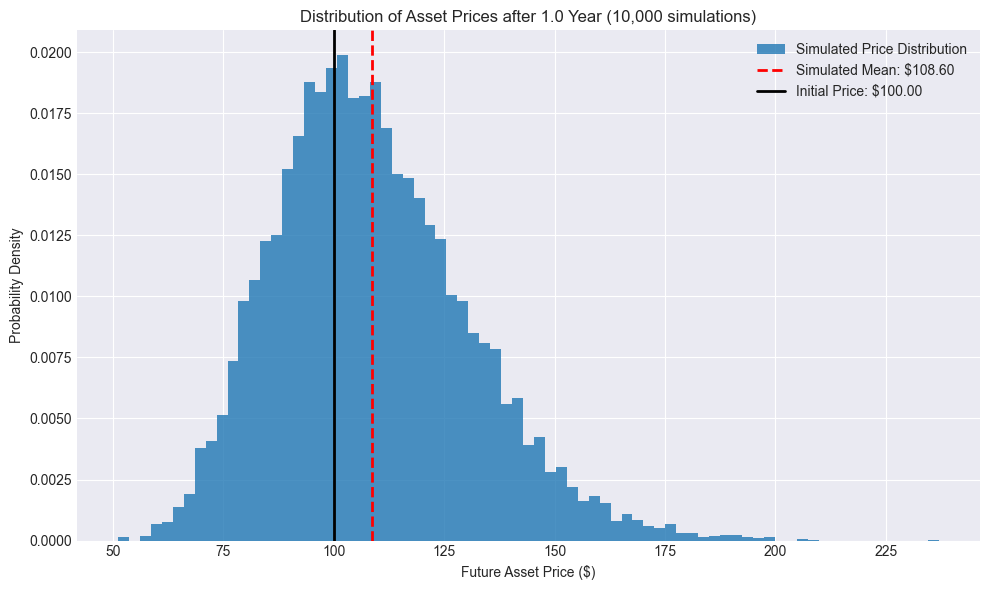

In [52]:
def project_asset_price(s0, mu, sigma, dt, num_simulations=1):
    """
    Projects a future asset price using the Geometric Brownian Motion formula.

    This function implements the formula:
    S_t = S_0 * exp((mu - 0.5 * sigma^2) * dt + sigma * epsilon * sqrt(dt))

    Args:
        s0 (float): The initial asset price (e.g., current stock price).
        mu (float): The annual drift or expected rate of return of the asset.
                    (e.g., 0.05 for 5%).
        sigma (float): The annual volatility (standard deviation) of the asset's returns.
                       (e.g., 0.2 for 20%).
        dt (float): The time step in years (e.g., 1 for one year, 1/252 for one trading day).
        num_simulations (int): The number of price paths to simulate.

    Returns:
        np.ndarray: An array of simulated future asset prices.
    """
    # Generate random numbers from a standard normal distribution (mean=0, stdev=1)
    # Epsilon (ε) in the formula.
    epsilon = np.random.normal(0, 1, num_simulations)

    # Calculate the future asset price using the GBM formula
    # This is a vectorized operation thanks to NumPy, so it calculates
    # all simulations at once efficiently.
    st = s0 * np.exp(
        (mu - 0.5 * sigma**2) * dt +
        sigma * epsilon * np.sqrt(dt)
    )

    return st

# --- Example ---

# --- 1. Define Simulation Parameters ---
initial_price = 100.0   # S0: Current price of the asset
expected_return = 0.08  # mu (μ): 8% annual expected return
volatility = 0.20       # sigma (σ): 20% annual volatility
time_horizon = 1.0      # dt (Δt): Projecting the price 1 year into the future

# --- 2. Project a Single Future Price ---
print("--- Single Price Projection ---")
projected_price = project_asset_price(initial_price, expected_return, volatility, time_horizon)
print(f"Initial Price (S0): ${initial_price:.2f}")
print(f"Projected Price in {time_horizon} year (S_T): ${projected_price[0]:.2f}\n")


# --- 3. Run a Monte Carlo Simulation ---
# This is the real power of the model: generating many possible outcomes.
num_simulations = 10000
print(f"--- Monte Carlo Simulation ({num_simulations:,} paths) ---")

# Get a distribution of possible future prices
future_prices = project_asset_price(
    s0=initial_price,
    mu=expected_return,
    sigma=volatility,
    dt=time_horizon,
    num_simulations=num_simulations
)

# --- 4. Analyze and Visualize the Results ---
average_price = np.mean(future_prices)
median_price = np.median(future_prices)

# The expected value of S_T is S0 * exp(mu * dt)
theoretical_mean = initial_price * np.exp(expected_return * time_horizon)

print(f"Average simulated price: ${average_price:.2f}")
print(f"Theoretical expected price: ${theoretical_mean:.2f}")
print(f"Median simulated price: ${median_price:.2f}")
print(f"Standard deviation of prices: ${np.std(future_prices):.2f}")

# Plot the results as a histogram
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(future_prices, bins=75, density=True, alpha=0.8, label='Simulated Price Distribution')
ax.axvline(average_price, color='red', linestyle='--', linewidth=2, label=f'Simulated Mean: ${average_price:.2f}')
ax.axvline(initial_price, color='black', linestyle='-', linewidth=2, label=f'Initial Price: ${initial_price:.2f}')

ax.set_title(f'Distribution of Asset Prices after {time_horizon} Year ({num_simulations:,} simulations)')
ax.set_xlabel('Future Asset Price ($)')
ax.set_ylabel('Probability Density')
ax.legend()
ax.grid(True)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


$\frac{1}{2}\sigma^2 S_t^2 \frac{d^2f}{dS_t^2} + rS_t \frac{df}{dS_t} + \frac{df}{dt} - rf = 0$

Solution of above equation and get the BSM formula:

call option price: $c = S_0 N(d_1) - K e^{-rT} N(d_2)$

put option price: $p = K e^{-rT} N(-d_2) - S_0 N(-d_1)$

where 
$d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}$

$d_2 = \frac{\ln(S_0/K) + (r - \sigma^2/2)T}{\sigma\sqrt{T}} = d_1 - \sigma\sqrt{T}$

- $N(d_2)$ is the risk-neutral probability that $S_T > K$. 
- $N(d_1)$ is the "delta"/hedge ratio of a call option, i.e. long shares needed per 1 short call to create riskless porfolio

In [53]:
def black_scholes_merton(S, K, T, r, sigma):
    """
    Calculates the Black-Scholes-Merton price for European call and put options.

    Args:
        S (float): Current price of the underlying asset (e.g., stock price).
        K (float): Strike price of the option.
        T (float): Time to expiration in years.
        r (float): Risk-free interest rate (annualized, e.g., 0.05 for 5%).
        sigma (float): Volatility of the underlying asset's returns (annualized, e.g., 0.2 for 20%).

    Returns:
        tuple: A tuple containing the call option price and the put option price.
    """
    # --- Step 1: Calculate d1 and d2 ---
    # d1 is a standardized value that incorporates all the variables.
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    # d2 is derived from d1 and represents the risk-adjusted probability of exercise.
    d2 = d1 - sigma * np.sqrt(T)

    # --- Step 2: Calculate the call and put prices using the BSM formula ---
    # N(d1) and N(d2) are the cumulative distribution functions (CDF) for a standard normal distribution.
    # norm.cdf() from scipy.stats is used for this calculation.

    # Call Option Price Formula: c = S * N(d1) - K * e^(-rT) * N(d2)
    call_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))

    # Put Option Price Formula: p = K * e^(-rT) * N(-d2) - S * N(-d1)
    put_price = (K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))

    return call_price, put_price

# --- Example Usage ---

# --- Input Parameters ---
# You can change these values to see how the option prices change.
stock_price = 100.0   # Current stock price (S)
strike_price = 105.0  # Strike price (K)
time_to_expiry = 1.0  # Time to expiration in years (T)
risk_free_rate = 0.05 # Risk-free rate (r)
volatility = 0.2      # Volatility (sigma)

# --- Calculation ---
call, put = black_scholes_merton(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility)

# --- Output Results ---
print("--- Black-Scholes-Merton Option Pricing ---")
print(f"Stock Price:       ${stock_price:.2f}")
print(f"Strike Price:      ${strike_price:.2f}")
print(f"Time to Expiry:    {time_to_expiry} years")
print(f"Risk-Free Rate:    {risk_free_rate:.2%}")
print(f"Volatility:        {volatility:.2%}")
print("-------------------------------------------")
print(f"Call Option Price: ${call:.2f}")
print(f"Put Option Price:  ${put:.2f}")
print("-------------------------------------------")


--- Black-Scholes-Merton Option Pricing ---
Stock Price:       $100.00
Strike Price:      $105.00
Time to Expiry:    1.0 years
Risk-Free Rate:    5.00%
Volatility:        20.00%
-------------------------------------------
Call Option Price: $8.02
Put Option Price:  $7.90
-------------------------------------------


In [54]:
# when assets pay a yield

def black_scholes_merton_yield(S, K, T, r, q, sigma):
    """
    Calculates the BSM price for European options on an asset paying a continuous dividend yield.
    Args:
        S (float): Current price of the underlying asset.
        K (float): Strike price of the option.
        T (float): Time to expiration in years.
        r (float): Risk-free interest rate (annualized).
        q (float): Continuous dividend yield (annualized, e.g., 0.02 for 2%).
        sigma (float): Volatility of the underlying asset's returns (annualized).

    Returns:
        tuple: A tuple containing the call option price and the put option price.
    """
    # --- Step 1: Calculate d1 and d2 with the dividend yield adjustment (r - q) ---
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # --- Step 2: Calculate prices using the adjusted stock price S * e^(-qT) ---
    # Call Option Price Formula
    call_price = (S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    
    # Put Option Price Formula
    put_price = (K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1))

    return call_price, put_price

# --- Calculation for BSM with dividend yield ---
# --- Input Parameters ---
# You can change these values to see how the option prices change.
stock_price = 100.0   # Current stock price (S)
strike_price = 105.0  # Strike price (K)
time_to_expiry = 1.0  # Time to expiration in years (T)
risk_free_rate = 0.05 # Risk-free rate (r)
volatility = 0.2      # Volatility (sigma)
dividend_yield = 0.02 # Continuous dividend yield (q)

call_with_div, put_with_div = black_scholes_merton_yield(stock_price, strike_price, time_to_expiry, risk_free_rate, dividend_yield, volatility)

# --- Output Results ---
print("--- Black-Scholes-Merton Option Pricing ---")
print(f"Stock Price:       ${stock_price:.2f}")
print(f"Strike Price:      ${strike_price:.2f}")
print(f"Time to Expiry:    {time_to_expiry} years")
print(f"Risk-Free Rate:    {risk_free_rate:.2%}")
print(f"Volatility:        {volatility:.2%}")
print("-------------------------------------------")

print("With Dividend Yield (q = 2.00%) ---")
print(f"Call Option Price: ${call_with_div:.2f}")
print(f"Put Option Price:  ${put_with_div:.2f}")
print("-------------------------------------------")



--- Black-Scholes-Merton Option Pricing ---
Stock Price:       $100.00
Strike Price:      $105.00
Time to Expiry:    1.0 years
Risk-Free Rate:    5.00%
Volatility:        20.00%
-------------------------------------------
With Dividend Yield (q = 2.00%) ---
Call Option Price: $6.99
Put Option Price:  $8.85
-------------------------------------------


<img src="sign_of_sensitivities.png" alt="Alt text" width="500">